In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
from datetime import datetime , timedelta,date
import time

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, distinct,desc,and_
from sqlalchemy.sql.functions import coalesce

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")
conn=engine.connect()

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
#Initialise the trip start date and end date
trip_start_date=(datetime.strptime('2018-06-01', "%Y-%m-%d")).date()
trip_end_date=(datetime.strptime('2018-06-05',"%Y-%m-%d")).date()


In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

In [12]:
from sqlalchemy import inspect
ins = inspect(engine)
for _t in ins.get_table_names():
    print(_t)

measurement
station


In [13]:
print(ins.get_columns('measurement'))


[{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}]


In [14]:
print(ins.get_columns('station'))

[{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}]


# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

n=session.query(func.max(Measurement.date)).all()
date_str = n[0][0]
formatter_string = "%Y-%m-%d" 
datetime_object = datetime.strptime(date_str, formatter_string)
date_object = datetime_object.date()
year_ago= date_object -dt.timedelta(days=365)
print(year_ago)


2016-08-23


In [16]:
df1=pd.DataFrame(session.query(Measurement.id,Measurement.station,Measurement.date,Measurement.prcp,Measurement.tobs)\
   .filter(Measurement.date>= year_ago).order_by(Measurement.date).all())
df1.set_index('date',inplace=True)

df1.fillna(0)

,id,station,prcp,tobs
date,,,,
2016-08-23,2364,USC00519397,0.00,81.0
2016-08-23,5091,USC00513117,0.15,76.0
2016-08-23,7331,USC00514830,0.05,80.0
2016-08-23,8825,USC00517948,0.00,80.0
2016-08-23,11851,USC00519523,0.02,80.0
2016-08-23,14608,USC00519281,1.79,77.0
2016-08-23,19202,USC00516128,0.70,74.0
2016-08-24,2365,USC00519397,0.08,79.0
2016-08-24,5092,USC00513117,2.15,76.0


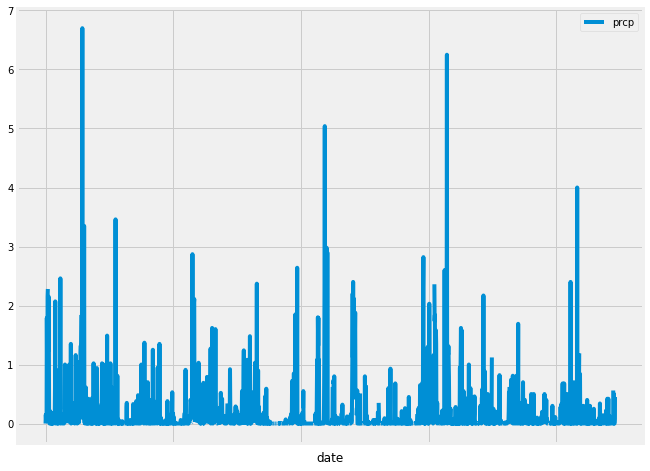

In [17]:
df1.reset_index().plot(x='date', y='prcp',figsize=(10,8))

In [18]:
df2=pd.DataFrame(df1['prcp'].describe())
df2.rename(columns={'prcp':'Precipitation'}, inplace=True)
df2

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# Design a query to show how many stations are available in this dataset?
#print(ins.get_columns('station'))
session.query(Station.name).distinct().count()

9

In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(desc(func.count(Measurement.station))).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
station_id=session.query(Measurement.station).group_by(Measurement.station)\
.order_by(desc(func.count(Measurement.station))).first()
#print(station_id[0])
session.query(func.max(Measurement.tobs),func.min(Measurement.tobs),func.avg(Measurement.tobs))\
.filter(Measurement.station==station_id[0]).all()

[(85.0, 54.0, 71.66378066378067)]

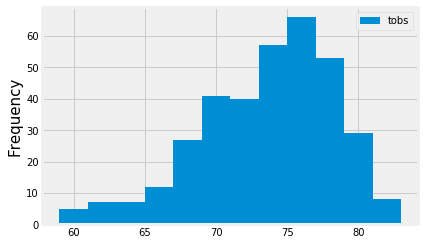

In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df2= pd.DataFrame(session.query(Measurement.date ,Measurement.tobs)\
.filter(and_(Measurement.station==station_id[0],Measurement.date >= '2016-08-23') ) .all())
#fig=plt.figure(figsize=(10,10))
df2['tobs'].plot.hist(bins=12)

plt.ylabel("Frequency",fontsize=15)
plt.legend(loc='best')

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
#print(calc_temps('2012-02-28', '2012-03-05'))

In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temp_list=calc_temps((trip_start_date -dt.timedelta(days=365)),(trip_end_date-dt.timedelta(days=365)))
temp_list
df3=pd.DataFrame(temp_list,columns=["Min Temp","Avg temp","Max Temp"])
df3["PTP"]=df3["Max Temp"]-df3["Min Temp"]
df3.reset_index(drop=True,inplace=True)
df3

,Min Temp,Avg temp,Max Temp,PTP
0,74.0,77.903226,81.0,7.0


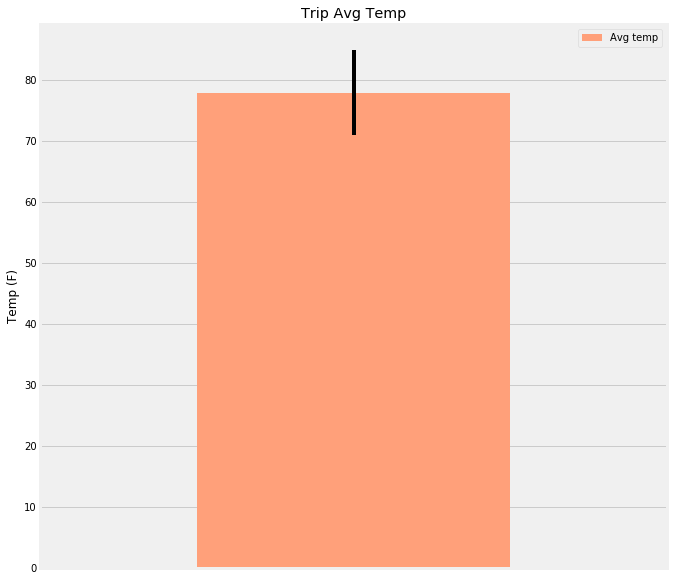

In [25]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
#plt.figure()
ax=df3.plot(y="Avg temp",kind='bar',yerr="PTP",figsize=(10,10),title="Trip Avg Temp",color='lightsalmon')
ax.set( xlabel="",ylabel='Temp (F)')
ax.get_xaxis().set_ticks([])
plt.show()

In [26]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
from sqlalchemy.sql.functions import coalesce
sel = [Station.station,Station.name, coalesce(Measurement.prcp,0),Station.latitude,Station.longitude,Station.elevation]
session.query(*sel).filter((Station.station == Measurement.station),(Measurement.date >= (trip_start_date -dt.timedelta(days=365)))\
                                             ,(Measurement.date <= (trip_start_date -dt.timedelta(days=365) ))).\
                                             order_by(desc(Measurement.prcp)).all()


[('USC00513117', 'KANEOHE 838.1, HI US', 0.03, 21.4234, -157.8015, 14.6),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  0.01,
  21.3331,
  -157.8025,
  152.4),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 0.0, 21.2716, -157.8168, 3.0),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  0.0,
  21.5213,
  -157.8374,
  7.0),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  0.0,
  21.33556,
  -157.71139,
  19.5),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  0.0,
  21.45167,
  -157.84888999999998,
  32.9)]

## Optional Challenge Assignment

In [27]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).one()
     
daily_normals("01-01")

(62.0, 69.15384615384616, 77.0)

In [28]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip 
from sqlalchemy.sql import func
from sqlalchemy.sql.expression import text
td = trip_end_date-trip_start_date
days=td.days
print(days)

4


In [29]:
date_range=[]
mth=[]
date_normals=[]

for i in range(0,days+1):
    next_day =str(trip_start_date+dt.timedelta(days=i))
    date_range.append(datetime.strptime(next_day,"%Y-%m-%d").date())

[mth.append(i.strftime("%m-%d")) for i in date_range]
[date_normals.append(daily_normals(i)) for i in mth]

print(date_range)

[datetime.date(2018, 6, 1), datetime.date(2018, 6, 2), datetime.date(2018, 6, 3), datetime.date(2018, 6, 4), datetime.date(2018, 6, 5)]


In [30]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
    
df6=pd.DataFrame(date_normals,columns=["Tmin","Tavg","Tmax"])
df6["Date"]=[v.strftime("%Y-%m-%d")  for v in date_range]
df6=df6[["Date","Tmin","Tavg","Tmax"]]
#df6
df6.set_index("Date", inplace=True)

[Text(0, 0, '2018-06-01'),
 Text(0, 0, '2018-06-02'),
 Text(0, 0, '2018-06-03'),
 Text(0, 0, '2018-06-04'),
 Text(0, 0, '2018-06-05')]

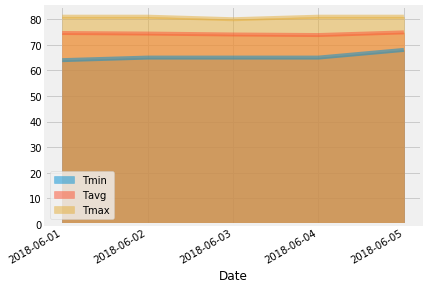

In [33]:
# Plot the daily normals as an area plot with `stacked=False`
#plt.figure(figsize=(15,10))
#df6.reset_index(inplace=True)
ax=df6.plot(kind='area',stacked=False,xticks=range(len(df6)))
#ax.set_xlim(0,4,1)

ax.set_xticklabels(df6.index,rotation=30 ,ha='right')